In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import os
import sys
import scipy.stats
import matplotlib as mpl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from compiler.ast import flatten
from sklearn.neighbors import NearestNeighbors
from itertools import groupby
import math
import networkx as nt
import gc
import psutil
import scipy.stats
#import Thestral
from scipy.stats.mstats import gmean

from scipy.stats import pearsonr
import community
import matplotlib.gridspec as gridspec
import random


/Users/liuqian/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: The compiler package is deprecated and removed in Python 3.x.


In [1]:
import scipy

In [4]:
scipy.version



<module 'scipy.version' from '/Users/liuqian/anaconda2/lib/python2.7/site-packages/scipy/version.pyc'>

# 这里直接就是该基因周围的所有Peak之和作为这个基因的大小

In [2]:
#常用函数
def Mkdir(DirX):
    if not os.path.exists(DirX):
        os.mkdir(DirX)

def Read(File):
    return pd.read_table(File,sep='\t',index_col=0)

def ReadBed(File):
    Bed=pd.read_table(File,sep='\t',index_col=None,header=None)
    Bed.index=Bed[3]
    return Bed

def Save(DF,File):
    DF.to_csv(File,sep='\t')

def SaveBed(Bed,File):
    Bed.to_csv(File,sep='\t',index=False,header=False)
    
def GetState(i):
    if 'Norm' in i: return 'Norm'
    if 'Arm' in i: return 'Arm'
    if 'Back' in i:return 'Back'
    
    
def ReadTable(Infile):return pd.read_table(Infile,sep='\t',index_col=0)

def Mkdir(DirX):
    if not os.path.exists(DirX):
        os.mkdir(DirX)

def meanCenter(L):
    m=np.mean(L)
    return [i-m for i in L]

def log10(L):return -math.log(L,10)

def p_adjust_bh(p):
    p = np.asfarray(p)
    by_descend = p.argsort()[::-1]
    by_orig = by_descend.argsort()
    steps = float(len(p)) / np.arange(len(p), 0, -1)
    q = np.minimum(1, np.minimum.accumulate(steps * p[by_descend]))
    return q[by_orig]

def ReadBed(BedFile):
    BedDF=pd.read_table(BedFile,sep='\t',header=None,index_col=None)
    BedDF.index=BedDF[3]
    return BedDF

def SaveTable(DF,FileName):DF.to_csv(FileName,sep='\t')
def SaveBed(BedDF,FileName):BedDF.to_csv(FileName,sep='\t',index=False,header=False)

    


In [3]:
#文件输入
CountF='/Users/liuqian/Documents/A_SSC_project/All/PeakCount.QNorm_Normalized.log2.txt'                  
BedF='/Users/liuqian/Documents/A_SSC_project/All/NormSScPeaks.bed'
outDir='/Users/liuqian/Documents/A_SSC_project/NetWork2'
BedDF=ReadBed(BedF)
CountDF=ReadTable(CountF)



In [13]:
def GetFDC(ct):
    NormA=CountDF[[i for i in list(CountDF) if 'Norm' in i and ct in i]]
    AffectedA=CountDF[[i for i in list(CountDF) if 'Arm' in i and ct in i]]
    return AffectedA.apply(np.mean,axis=1)-NormA.apply(np.mean,axis=1)


In [14]:
FDC_df=pd.DataFrame({}, index=CountDF.index)
FDC_df['CD4']=GetFDC('CD4')
FDC_df['CD8']=GetFDC('CD8')
FDC_df['Fib']=GetFDC('Fib')
FDC_df['DC']=GetFDC('DC')



In [33]:
FDC_df.index

Index([u'NormSSc.1', u'NormSSc.2', u'NormSSc.3', u'NormSSc.4', u'NormSSc.5',
       u'NormSSc.6', u'NormSSc.7', u'NormSSc.8', u'NormSSc.9', u'NormSSc.10',
       ...
       u'NormSSc.104213', u'NormSSc.104214', u'NormSSc.104215',
       u'NormSSc.104216', u'NormSSc.104217', u'NormSSc.104218',
       u'NormSSc.104219', u'NormSSc.104220', u'NormSSc.104221',
       u'NormSSc.104222'],
      dtype='object', name=u'PeakID', length=104222)

In [32]:
FDC_df.loc[AnoDF[AnoDF['Gene Name']=='TGFBR2'].index].apply(np.mean,axis=0)


CD4    0.230452
CD8   -0.181451
Fib   -0.262417
DC     0.345676
dtype: float64

In [31]:
BedDF.loc[AnoDF[AnoDF['Gene Name']=='TGFBR2'].index]

,0,1,2,3,4,5,6
PeakID (cmd=annotatePeaks.pl /Users/liuqian/Documents/A_SSC_project/All/NormSScPeaks.bed hg19),,,,,,,
NormSSc.62485,chr3,30685576,30686660,NormSSc.62485,1084,+,5
NormSSc.62492,chr3,30722886,30723885,NormSSc.62492,999,+,3
NormSSc.62488,chr3,30699494,30700453,NormSSc.62488,959,+,3
NormSSc.62479,chr3,30647669,30648566,NormSSc.62479,897,+,3
NormSSc.62472,chr3,30559544,30560391,NormSSc.62472,847,+,3
NormSSc.62463,chr3,30395418,30396207,NormSSc.62463,789,+,3
NormSSc.62483,chr3,30672632,30673403,NormSSc.62483,771,+,3
NormSSc.62470,chr3,30535406,30536157,NormSSc.62470,751,+,3
NormSSc.62496,chr3,30749912,30750603,NormSSc.62496,691,+,3


In [4]:
##1.
#Recepter-Ligand文件的读取
RLDF1=open('/Users/liuqian/Documents/A_SSC_project/NetWork/DLRP.All_LigandRecepter_Interaction.txt').readlines()
RLDF2=pd.read_table('/Users/liuqian/Documents/A_SSC_project/NetWork/interactions_cellphonedb.csv',sep=',',index_col=0)[['entry_name_a','entry_name_b']].dropna(axis=0,how='any')             

A=[i.split('_')[0] for i in RLDF2['entry_name_a']]
B=[i.split('_')[0] for i in RLDF2['entry_name_b']]
RLList=list(set(A+B))
RL=[A[i]+'-'+B[i] for i in range(len(A))]

l=1
for line in RLDF1:
    if line[0]=='#':continue
    if line=='\n':
        l=1
        continue
    if l:
        Gene1=line.split('\t')[1]
        if Gene1 not in RLList:
            print Gene1
            RLList.append(Gene1)
        l=0
    else:
        Gene2=line.split('\t')[1]
        if Gene2 not in RLList:
            RLList.append(Gene2)
            print Gene2
        if (Gene1+'-'+Gene2 not in RL) and (Gene2+'-'+Gene1 not in RL): 
            RL.append(Gene1+'-'+Gene2)
            print Gene1+'-'+Gene2
            
            

TNF
TNFRSF1A
TNF-TNFRSF1A
TNFRSF1B
TNF-TNFRSF1B
LTBR
TNF-LTBR
TNFSF7
TNFRSF7
TNFSF7-TNFRSF7
LTA
LTA-TNFRSF1A
LTA-TNFRSF1B
TNFRSF14
LTA-TNFRSF14
LTA-LTBR
TNFSF8
TNFRSF8
TNFSF8-TNFRSF8
LTB
LTB-LTBR
TNFSF5
TNFRSF5
TNFSF5-TNFRSF5
TNFSF6
TNFRSF6
TNFSF6-TNFRSF6
TNFRSF6B
TNFSF6-TNFRSF6B
TNFSF13
TNFSF10
TNFRSF10A
TNFSF10-TNFRSF10A
TNFRSF10B
TNFSF10-TNFRSF10B
TNFRSF10C
TNFSF10-TNFRSF10C
TNFRSF10D
TNFSF10-TNFRSF10D
TNFRSF11B
TNFSF10-TNFRSF11B
TNFSF11
TNFRSF11A
TNFSF11-TNFRSF11A
TNFSF11-TNFRSF11B
TNFSF9
TNFRSF9
TNFSF9-TNFRSF9
TNFSF4
TNFRSF4
TNFSF4-TNFRSF4
TNFSF14
TNFSF14-TNFRSF14
TNFSF14-TNFRSF6B
TNFSF14-LTBR
TNFSF12
TNFRSF12
TNFSF12-TNFRSF12
TNFSF18
TNFRSF18
TNFSF18-TNFRSF18
IL2
IL2RA
IL2-IL2RA
IL2RB
IL2-IL2RB
IL2RG
IL2-IL2RG
IL7
IL7R
IL7-IL7R
IL7-IL2RG
IL9
IL9R
IL9-IL9R
IL9-IL2RG
IL15RA
IL15-IL15RA
IL15-IL2RB
IL15-IL2RG
IL4
IL4R
IL4-IL4R
IL4-IL2RG
IL13RA1
IL4-IL13RA1
IL13-IL13RA1
IL13RA2
IL13-IL13RA2
IL13-IL4R
IL13-IL2RG
IL3
IL3RA
IL3-IL3RA
CSF2RB
IL3-CSF2RB
IL5
IL5RA
IL5-IL5RA
IL5-CSF2RB
CSF2


# 用Homer annotation 把距离基因最近的peak分配给基因

In [16]:
AnoDF=pd.DataFrame(ReadTable('/Users/liuqian/Documents/A_SSC_project/All/NormSScPeaks.bed.ano.txt')['Gene Name'])
RLList_st=[]
Count_df=[]

for i in RLList:
    if i in list(AnoDF['Gene Name']):
        RLList_st.append(i)
        Count_df.append(list(CountDF.loc[list(AnoDF[AnoDF['Gene Name']==i].index)].apply(sum,axis=0)))
Count_df=pd.DataFrame(Count_df,index=RLList_st,columns=list(CountDF))        
                


In [6]:
##3
##Tho=4
#以下的Code用于对每个细胞类型的Norm-Arm之间的差异进行比较
#首先去除太小的Gene   Count_df.apply(max,axis=1)>10
#计算剩余基因的Arm-Norm 的 FoldChange
def FoldChange(RL_df):
    CellType=['CD4','CD8','DC','Fib']
    FDC_df=pd.DataFrame({},index=RL_df.index)
    Header=list(RL_df)
    for ct in CellType:
        Norm=[i for i in Header if (ct in i) and ('Norm' in i)]
        Arm=[i for i in Header if (ct in i) and ('Arm' in i)]
        MNorm=RL_df[Norm].apply(np.mean,axis=1)
        MArm=RL_df[Arm].apply(np.mean,axis=1)
        L=[]
        for i in range(len(MArm)):
#             if max(MArm[i],MNorm[i])<tho:
#                 L.append(0)
#             else:
            L.append(MArm[i]-MNorm[i])
        FDC_df[ct]=L
    return FDC_df
Count_DF=Count_df[Count_df.apply(max,axis=1)>10]
FDC_df=FoldChange(Count_DF)
FDC_df_Final=FDC_df[FDC_df.apply(max,axis=1)>0]
FDC_df_NormH=(-FDC_df)[(-FDC_df).apply(max,axis=1)>0]
FDC_df_NormH.loc['CCR7']=[0,0,0,0]
outDir='/Users/liuqian/Documents/A_SSC_project/NetWork2'
outDir=os.path.join(outDir,'Max.10')
Mkdir(outDir)


In [7]:
##4
#寻找剩余可能存在的Recepter-Ligand
def FindRLpair(RL):
    RLState=[]  #最终找到的可能存在的Recepter-Ligand 作用
    S=list(FDC_df_Final.index)
    for rl in RL:
        P=rl.split('-')
        if (P[0] in S) and (P[1] in S):
            RLState.append(rl)
    return RLState
RLStay=FindRLpair(RL)


In [8]:
##5
#两个细胞类型间的相互作用指数为两个细胞类型在Recepter-Ligand上的Fold-Change的加和（如果其中两个FoldChange都小于0那么相互作用设置为最小的FoldChange，否则如果最大的FoldChange                                     
#小于1那么相互作用设置为0，其他情况设置为二者的加和

#如果二者的相互作用指数大于 x(可以设置)那么认为二者在疾病状态下存在上调的相互作用

def Muxp(a,b):
    if (a<0) and (b<0):
        return min([a,b])
    elif max(a,b)<1:
        return 0
    else:
        return a+b



In [9]:
##6
##对每两个细胞类型间是否存在Recepter-Ligand进行展示（CD4-CD8,CD4-DC,CD4-Fib,CD8-DC,CD8-Fib,DC-Fib）
def GetRLCellTypepair(FDC_df_Final,x):
    RLCellTypes_df=pd.DataFrame({})
    RLCellTypesCount_df=pd.DataFrame({})
    
    CellType=['CD4','CD8','DC','Fib']
    J=[]
    for i1 in range(len(CellType)-1):
        for i2 in range(i1+1,len(CellType)):
            ct1=CellType[i1]
            ct2=CellType[i2]
            CT1=FDC_df_Final[ct1]
            CT2=FDC_df_Final[ct2]
            S=[]
            C=[]
            RLFinal=[]
            for rl in RLStay:
                try:
                    rl1,rl2=rl.split('-')
                    count=max(Muxp(CT1[rl2],CT2[rl1]),Muxp(CT1[rl1],CT2[rl2]))
                    J.append(count)
                    if count>x:
                        S.append(1)
                        C.append(count)
                    else:
                        S.append(0)
                        C.append(0)
                    RLFinal.append(rl)
                except KeyError:
                    continue
            RLCellTypes_df[ct1+'-'+ct2]=S
            RLCellTypesCount_df[ct1+'-'+ct2]=C
    RLCellTypes_df.index=RLFinal
    RLCellTypesCount_df.index=RLFinal
    RLCellTypes_df=RLCellTypes_df[RLCellTypes_df.apply(sum,axis=1)>1]
    RLCellTypesCount_df=RLCellTypesCount_df.loc[RLCellTypes_df.index]
    return RLCellTypes_df,RLCellTypesCount_df
RLCellTypes_df,RLCellTypesCount_df=GetRLCellTypepair(FDC_df_Final,7)     #大于7才认为存在相互作用

Norm_RLCellTypes_df,Norm_RLCellTypesCount_df=GetRLCellTypepair(FDC_df_NormH,7)  

In [12]:
myCmap=sns.light_palette("#CA4641",as_cmap=True)

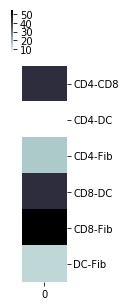

CD4-CD8    45
CD4-DC      5
CD4-Fib    17
CD8-DC     45
CD8-Fib    55
DC-Fib     14
dtype: int64

In [13]:
fig=sns.clustermap(Norm_RLCellTypes_df.apply(sum),figsize=(1,5),col_cluster=False,row_cluster=False,cmap='bone_r')
plt.show()
fig.savefig('/Users/liuqian/Documents/A_SSC_project/NetWork2/A_Max.10/Norm.RLCellTypes_df.Cluster.Count.colSum.pdf')         
Norm_RLCellTypes_df.apply(sum)


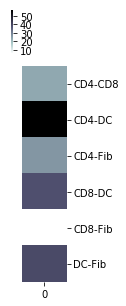

CD4-CD8    24
CD4-DC     57
CD4-Fib    27
CD8-DC     39
CD8-Fib     6
DC-Fib     40
dtype: int64

In [14]:
fig=sns.clustermap(RLCellTypes_df.apply(sum),figsize=(1,5),col_cluster=False,row_cluster=False,cmap='bone_r')
plt.show()
fig.savefig('/Users/liuqian/Documents/A_SSC_project/NetWork2/A_Max.10/RLCellTypes_df.Cluster.Count.colSum.pdf')

RLCellTypes_df.apply(sum)

In [15]:
#上述
ColSum=RLCellTypes_df.apply(sum,axis=0)
RowSum=pd.DataFrame(RLCellTypes_df.apply(sum,axis=1))


#上述
NormColSum=Norm_RLCellTypes_df.apply(sum,axis=0)
NormRowSum=pd.DataFrame(Norm_RLCellTypes_df.apply(sum,axis=1))


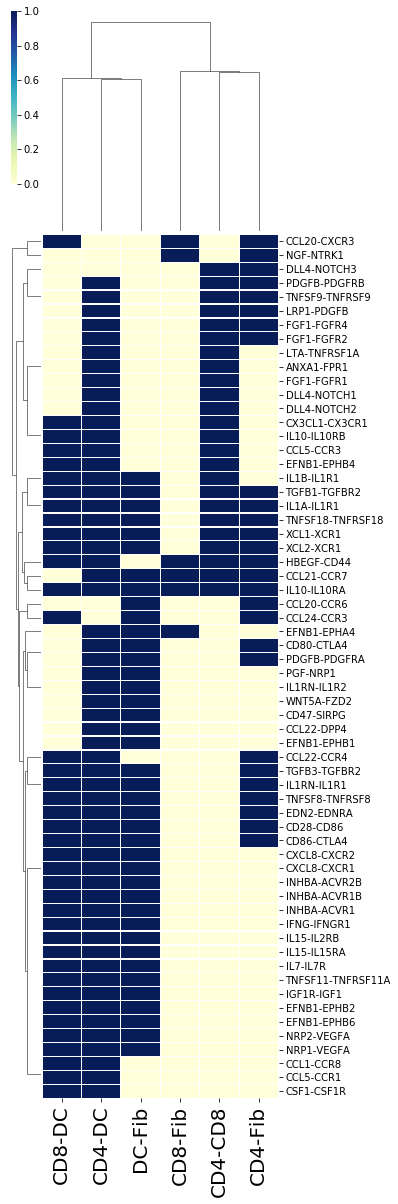

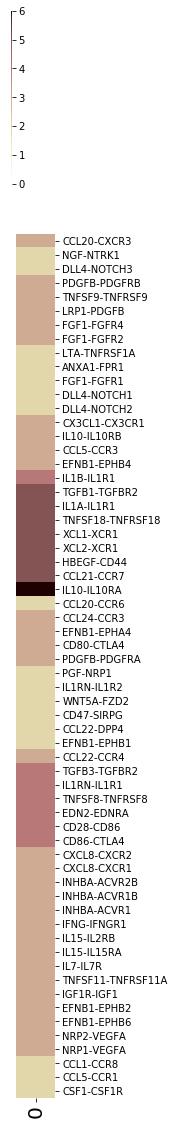

In [16]:
###用Heatmap展示
fig1=sns.clustermap(RLCellTypes_df,vmax=1,vmin=0,figsize=(4.8,20),cmap='YlGnBu',row_cluster=True,col_cluster=True,yticklabels=RLCellTypes_df.index,linewidths=0.2,linecolor='w')                      
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'RLCellTypes_df.Cluster.pdf'))
plt.show()
Save(RLCellTypes_df,os.path.join(outDir,'RLCellTypes_df.Cluster.txt'))

RLOrder=[RLCellTypes_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
RowSumOrder=RowSum.loc[RLOrder]
fig3=sns.clustermap(RowSumOrder,figsize=(0.8,20),cmap='pink_r',vmin=0,vmax=6,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'RLCellTypes_df.sorted.sumRow.pdf'))




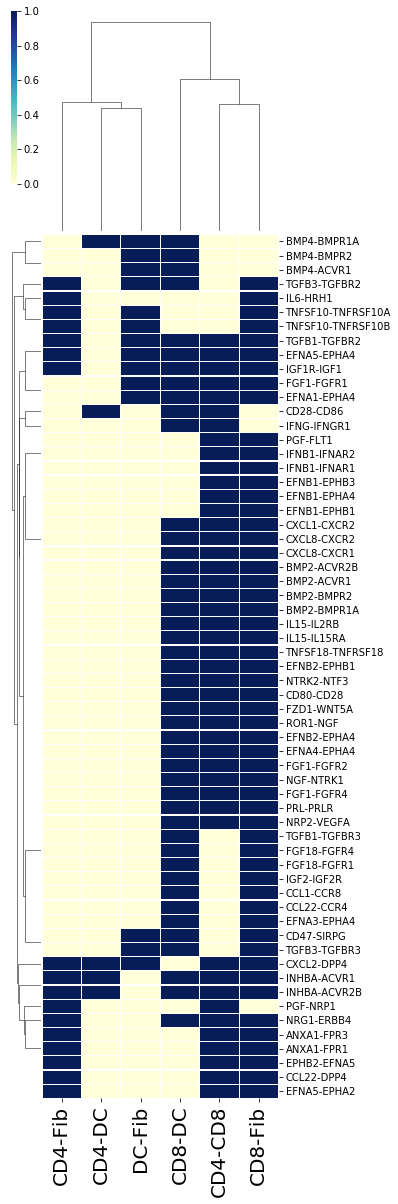

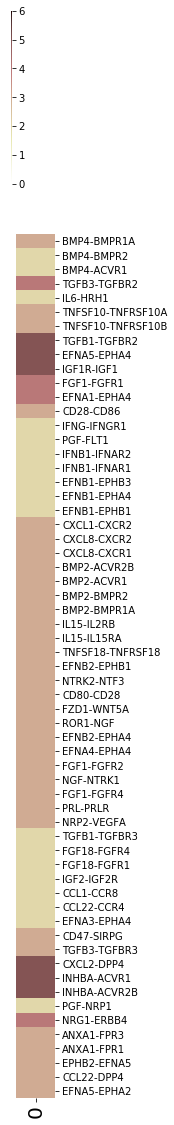

In [17]:
#正常人中上调的
fig1=sns.clustermap(Norm_RLCellTypes_df,vmax=1,vmin=0,figsize=(4.8,20),cmap='YlGnBu',row_cluster=True,col_cluster=True,yticklabels=Norm_RLCellTypes_df.index,linewidths=0.2,linecolor='w')                      
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'NormUp.RLCellTypes_df.Cluster.pdf'))
plt.show()
Save(Norm_RLCellTypes_df,os.path.join(outDir,'NormUp.RLCellTypes_df.Cluster.txt'))

RLOrder=[Norm_RLCellTypes_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
RowSumOrder=NormRowSum.loc[RLOrder]
fig3=sns.clustermap(RowSumOrder,figsize=(0.8,20),cmap='pink_r',vmin=0,vmax=6,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'NormUp.RLCellTypes_df.sorted.sumRow.pdf'))






In [18]:
sum([1 for i in RLCellTypesCount_df.index if i in Norm_RLCellTypesCount_df.index])




25

In [19]:
SaveTable(RLCellTypesCount_df,'/Users/liuqian/Documents/A_SSC_project/NetWork2/A_Max.10/RLCellTypes_df.Cluster.Score.txt')         

SaveTable(Norm_RLCellTypesCount_df,'/Users/liuqian/Documents/A_SSC_project/NetWork2/A_Max.10/NormUp.RLCellTypes_df.Cluster.Score.txt')         



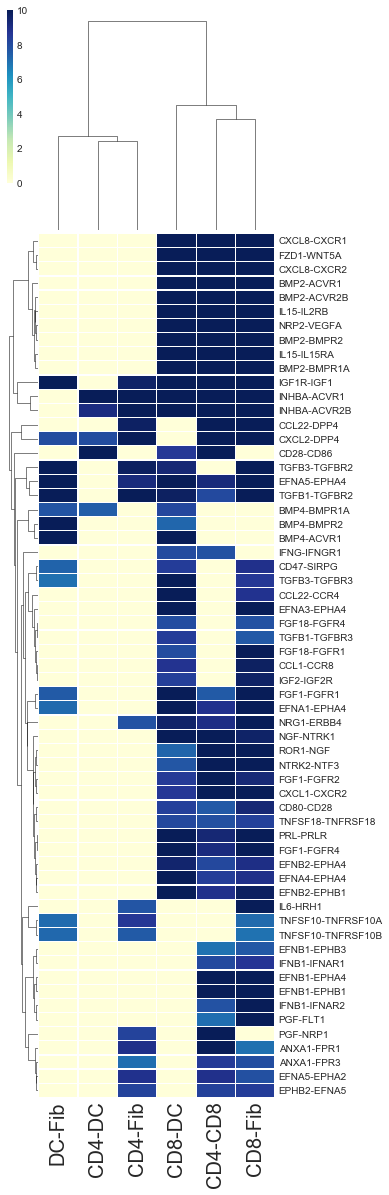

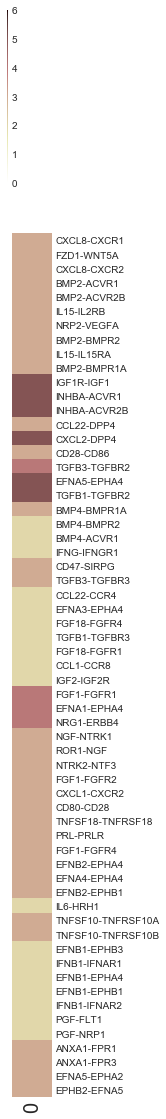

In [44]:
#Save Norm high 
fig1=sns.clustermap(Norm_RLCellTypesCount_df,figsize=(4.8,20),cmap='YlGnBu',row_cluster=True,col_cluster=True,vmin=0,vmax=10,yticklabels=Norm_RLCellTypes_df.index,linewidths=0.2,linecolor='w')
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'NormUp.RLCellTypes_df.Cluster.Count.pdf'))
plt.show()
Save(Norm_RLCellTypes_df,os.path.join(outDir,'NormUp.RLCellTypes_df.Cluster.Count.txt'))

RLOrder=[Norm_RLCellTypesCount_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
RowSumOrder=NormRowSum.loc[RLOrder]
fig3=sns.clustermap(RowSumOrder,figsize=(0.8,20),cmap='pink_r',vmin=0,vmax=6,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'NormUp.RLCellTypes_df.sorted_byCount.sumRow.pdf'))





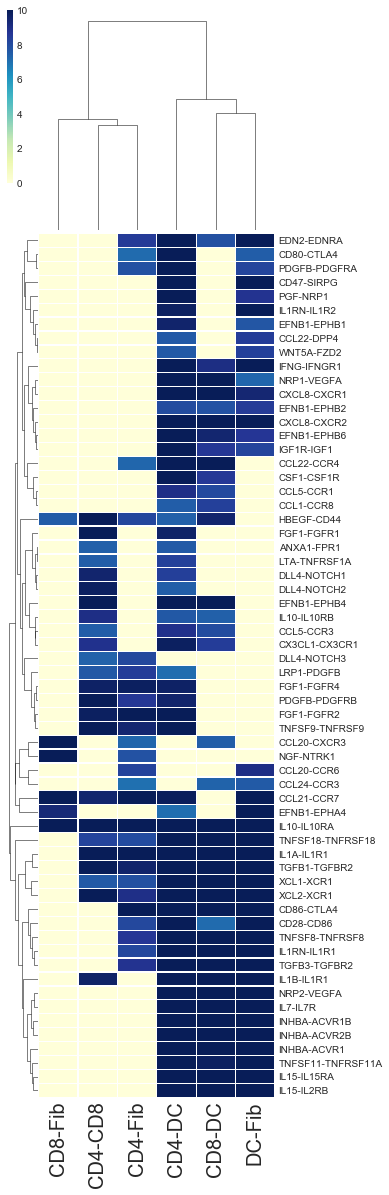

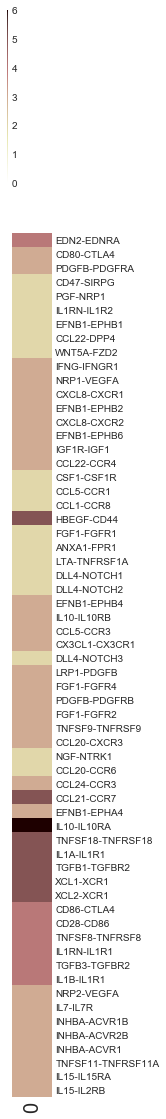

In [45]:
#Save SSC high 
fig1=sns.clustermap(RLCellTypesCount_df,figsize=(4.8,20),cmap='YlGnBu',row_cluster=True,col_cluster=True,vmin=0,vmax=10,yticklabels=RLCellTypes_df.index,linewidths=0.2,linecolor='w')
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'RLCellTypes_df.Cluster.Count.pdf'))
plt.show()
Save(RLCellTypes_df,os.path.join(outDir,'RLCellTypes_df.Cluster.Count.txt'))

RLOrder=[RLCellTypesCount_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
RowSumOrder=RowSum.loc[RLOrder]
fig3=sns.clustermap(RowSumOrder,figsize=(0.8,20),cmap='pink_r',vmin=0,vmax=6,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'RLCellTypes_df.sorted_byCount.sumRow.pdf'))



# 7
##这一步根据上面RLCellTypes_df的结果,画细胞间相互作用网络,圈大小代表这个细胞和其他细胞类型相互作用的总数，连线的粗细代表相互作用的RL的数目        

{'CD8-CD4': 24, 'CD8-Fib': 6, 'CD4-DC': 57, 'Fib-DC': 40, 'CD4-Fib': 27, 'CD4-CD8': 24, 'DC-CD4': 57, 'DC-CD8': 39, 'Fib-CD4': 27, 'CD8-DC': 39, 'Fib-CD8': 6, 'DC-Fib': 40}
{'CD4': 108, 'Fib': 73, 'CD8': 69, 'DC': 136}
[27, 24, 57, 6, 40, 39]
[108, 73, 69, 136]


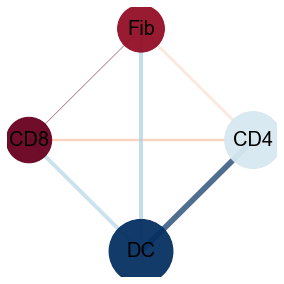

In [20]:
##7
##这一步根据上面RLCellTypes_df的结果,画细胞间相互作用网络,圈大小代表这个细胞和其他细胞类型相互作用的总数，连线的粗细代表相互作用的RL的数目                      
ClusterColorsDict={'CD4':'#EC2427','CD8':'#F15E25','Mac':'#231F20','Fib':'#3B54A4','CD31':'#EB0D8C','DC':'#6CBE46','LC':'#34C5F4','KC':'#F6EC13'}          
ClusterMarkerDict={'Norm':'o','Back':'^','Arm':'s'}
StateColorDict={'Norm':'#1B5B9C','Arm':'#C94540','Back':'coral','Norm-Arm-Back':'#8B8C8F','Arm-Back':'#4D2A7C','Norm-Arm':'#675EA9','Norm-Back':'#4B86C6'}        

def NetWork(RLCellTypes_df,label=''):
    CellType=['CD4','CD8','DC','Fib']
    Count=RLCellTypes_df.apply(sum,axis=0)
    NodeSize={}
    EdgeColor={}
    G=nt.Graph() 
    G.add_nodes_from(CellType) 
    for i1 in range(len(CellType)):
        C1=CellType[i1]
        NodeSize[C1]=sum([Count[i] for i in Count.index if C1 in i])
        if i1==len(CellType)-1:continue
        for i2 in range(i1+1,len(CellType)):
            C2=CellType[i2]
            G.add_edge(C1,C2)
            try:
                EdgeColor[C1+'-'+C2]=Count[C1+'-'+C2]
                EdgeColor[C2+'-'+C1]=Count[C1+'-'+C2]
            except KeyError:
                print C2+'-'+C1
                EdgeColor[C2+'-'+C1]=Count[C2+'-'+C1]
                EdgeColor[C1+'-'+C2]=Count[C2+'-'+C1]
    print EdgeColor
    print NodeSize
    pos=nt.circular_layout(G)
    plt.style.use('seaborn-white')
    fig1=plt.figure(figsize=(5,5))
    ax1=fig1.add_axes([0.15,0.15,0.75,0.75])
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.set_xticks([])
    ax1.set_yticks([])
    edge_color=[EdgeColor[E[0]+'-'+E[1]] for E in list(G.edges)]
    edge_width=[i/10.0 for i in edge_color]
    node_color=[NodeSize[i] for i in list(G.nodes)]
    node_size=[30*i for i in node_color]
    print edge_color
    print node_color
    nt.draw_networkx_edges(G,pos,alpha=0.7,width=edge_width,edge_color=edge_color,edge_cmap=plt.cm.RdBu,ax=ax1) #edge_vmax=45,edge_vmin=20
    nt.draw_networkx_nodes(G,pos,alpha=0.95,node_size=node_size,node_color=node_color,cmap='RdBu',label=G.nodes,withlabel=True,ax=ax1,linewidth=0) #   vmin=70,vmax=120    
    nt.draw_networkx_labels(G, pos, font_size=20)
    fig1.savefig(os.path.join(outDir,label+'CellTypeTrans.NetWork.pdf'))
    plt.show()                
                
NetWork(RLCellTypes_df)                
                


{'CD8-CD4': 45, 'CD8-Fib': 55, 'CD4-DC': 5, 'Fib-DC': 14, 'CD4-Fib': 17, 'CD4-CD8': 45, 'DC-CD4': 5, 'DC-CD8': 45, 'Fib-CD4': 17, 'CD8-DC': 45, 'Fib-CD8': 55, 'DC-Fib': 14}
{'CD4': 67, 'Fib': 86, 'CD8': 145, 'DC': 64}
[17, 45, 5, 55, 14, 45]
[67, 86, 145, 64]


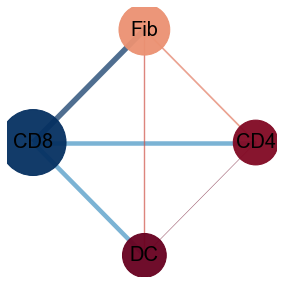

In [21]:
NetWork(Norm_RLCellTypes_df,label='NormUp') 


# 正常人和患者的Recepter_Ligand放在同一个Heatmap中

In [22]:
AllRL=list(set(list(RLCellTypesCount_df.index)+list(Norm_RLCellTypesCount_df.index)))

def Muxp2(a,b):
    if a*b<0:
        return 0
    elif max(abs(a),abs(b))<1:
        return 0
    else:
        return a+b


def GetRLCellTypepair2(FDC_df_Final,x):
    RLCellTypes_df=pd.DataFrame({})
    RLCellTypesCount_df=pd.DataFrame({})
    
    CellType=['CD4','CD8','DC','Fib']
   
    
    for i1 in range(len(CellType)-1):
        for i2 in range(i1+1,len(CellType)):
            ct1=CellType[i1]
            ct2=CellType[i2]
            CT1=FDC_df_Final[ct1]
            CT2=FDC_df_Final[ct2]
            S=[]
            C=[]
            RLFinal=[]
            for rl in AllRL:
                try:
                    rl1,rl2=rl.split('-')
                    A=Muxp2(CT1[rl2],CT2[rl1])
                    B=Muxp2(CT1[rl1],CT2[rl2])
                    if abs(A)>abs(B):
                        count=A
                    elif abs(B)>abs(A):
                        count=B
                    else:
                        count=0
                    if count>x:
                        S.append(1)
                        C.append(count)
                    elif count<-x:
                        S.append(-1)
                        C.append(count)                           
                    else:
                        S.append(0)
                        C.append(0)
                    RLFinal.append(rl)
                except KeyError:
                    continue
            RLCellTypes_df[ct1+'-'+ct2]=S
            RLCellTypesCount_df[ct1+'-'+ct2]=C
    RLCellTypes_df.index=RLFinal
    RLCellTypesCount_df.index=RLFinal
    RLCellTypes_df=RLCellTypes_df[abs(RLCellTypes_df).apply(sum,axis=1)>1]
    RLCellTypesCount_df=RLCellTypesCount_df.loc[RLCellTypes_df.index]
    return RLCellTypes_df,RLCellTypesCount_df    

AllRLCellTypes_df,AllRLCellTypesCount_df = GetRLCellTypepair2(FDC_df_Final,7)



In [23]:
[i for i in list(AllRLCellTypes_df[AllRLCellTypes_df['CD4-DC']>0].index) if i not in list(RLCellTypes_df[RLCellTypes_df['CD4-DC']>0].index)]


['IFNB1-IFNAR2',
 'IFNB1-IFNAR1',
 'IL6-HRH1',
 'EFNB1-EPHB3',
 'CD80-CD28',
 'NTRK2-NTF3']

In [24]:
FDC_df_Final.loc['XCL2']


CD4    0.406451
CD8    1.870407
DC     1.148936
Fib    0.053909
Name: XCL2, dtype: float64

In [25]:
FDC_df_Final.loc['XCR1']

CD4     8.964152
CD8     3.246061
DC     11.348450
Fib     2.071865
Name: XCR1, dtype: float64

In [26]:
SSCup_RowSum=AllRLCellTypes_df[AllRLCellTypes_df>0].fillna(0).apply(sum,axis=1)
Normup_RowSum=AllRLCellTypes_df[AllRLCellTypes_df<0].fillna(0).apply(sum,axis=1)

AllRLCellTypesCount_df=AllRLCellTypesCount_df[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]
RLOrder=list(AllRLCellTypes_df.apply(sum,axis=1).sort_values().index)
AllRLCellTypesCount_df=AllRLCellTypesCount_df.loc[RLOrder]


SSCup_ColSum=AllRLCellTypes_df[AllRLCellTypes_df>0].fillna(0).apply(sum,axis=0)[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]
Normup_ColSum=abs(AllRLCellTypes_df[AllRLCellTypes_df<0].fillna(0).apply(sum,axis=0)[['CD8-Fib','CD8-DC','CD4-CD8','CD4-Fib','DC-Fib','CD4-DC']]) 



In [27]:
Normup_ColSum

CD8-Fib    42.0
CD8-DC     25.0
CD4-CD8    20.0
CD4-Fib    12.0
DC-Fib      9.0
CD4-DC      0.0
dtype: float64

In [28]:
(22+53+22)/(22+53+22+25+9.0)

0.7404580152671756

In [29]:
42+25+20

87

In [30]:
22+53+22+25+9.0

131.0

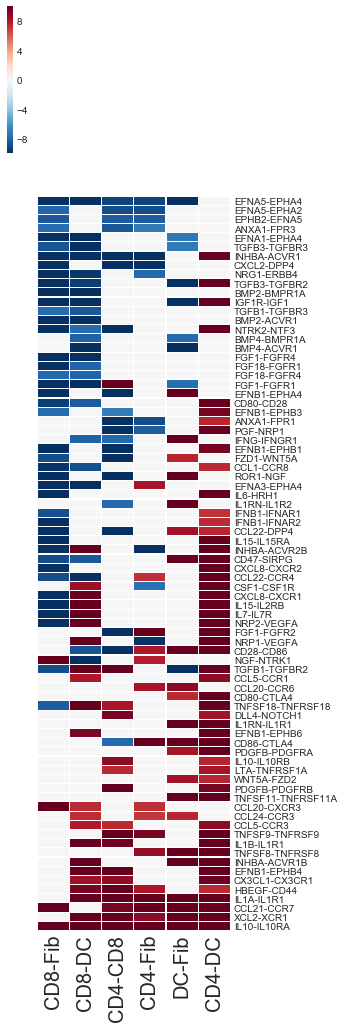

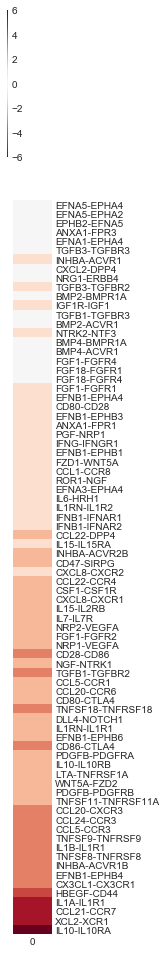

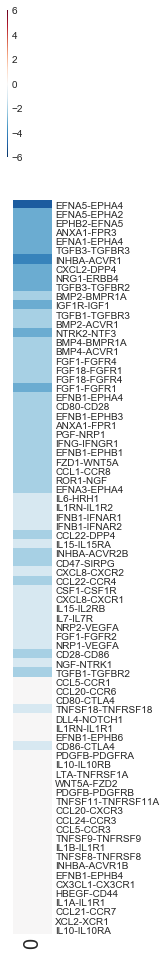

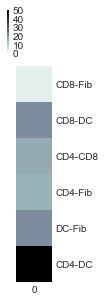

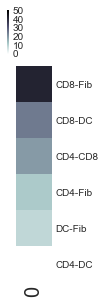

In [31]:

#Save All Recepter
fig1=sns.clustermap(AllRLCellTypesCount_df,figsize=(4,17),cmap='RdBu_r',row_cluster=False,col_cluster=False,vmin=-10,vmax=10,yticklabels=AllRLCellTypesCount_df.index,linewidths=0.1,linecolor='w')
plt.setp(fig1.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig1.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
fig1.savefig(os.path.join(outDir,'AllUp_RLCellTypes_df.Cluster.Count.pdf'))
plt.show()
Save(AllRLCellTypes_df,os.path.join(outDir,'AllUp_RLCellTypes_df.Cluster.Count.txt'))


#RLOrder=[AllRLCellTypesCount_df.index[i] for i in fig1.dendrogram_row.reordered_ind]
SSc_RowSumOrder=SSCup_RowSum.loc[RLOrder]
Norm_RowSumOrder=Normup_RowSum.loc[RLOrder]

fig2=sns.clustermap(SSc_RowSumOrder,figsize=(0.8,17),cmap='RdBu_r',vmin=-6,vmax=6,yticklabels=SSc_RowSumOrder.index,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig2.savefig(os.path.join(outDir,'AllUp.SSc_RLCellTypes_df.sorted_byCount.sumRow.pdf'))


fig3=sns.clustermap(Norm_RowSumOrder,figsize=(0.8,17),cmap='RdBu_r',vmin=-6,vmax=6,yticklabels=Norm_RowSumOrder.index,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'AllUp.Norm_RLCellTypes_df.sorted_byCount.sumRow.pdf'))



fig2=sns.clustermap(SSCup_ColSum,figsize=(0.8,5),cmap='bone_r',vmin=0,vmax=50,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig2.savefig(os.path.join(outDir,'AllUp.SSc_RLCellTypes_df.sorted_byCount.sumCol.pdf'))


fig3=sns.clustermap(Normup_ColSum,figsize=(0.8,5),cmap='bone_r',vmin=0,vmax=50,row_cluster=False,col_cluster=False)
plt.setp(fig3.ax_heatmap.get_yticklabels(), rotation=0,fontsize=10)
plt.setp(fig3.ax_heatmap.get_xticklabels(), rotation=90,fontsize=20)
plt.show()
fig3.savefig(os.path.join(outDir,'AllUp.Norm_RLCellTypes_df.sorted_byCount.sumCol.pdf'))





In [36]:
SSCup_ColSum

CD8-Fib     4.0
CD8-DC     22.0
CD4-CD8    17.0
CD4-Fib    16.0
DC-Fib     22.0
CD4-DC     53.0
dtype: float64

In [37]:
Normup_ColSum

CD8-Fib    42.0
CD8-DC     25.0
CD4-CD8    20.0
CD4-Fib    12.0
DC-Fib      9.0
CD4-DC      0.0
dtype: float64

In [45]:
4+22+17

43

# 相互作用的网络图


##### 把上面提到的所有配受体展示在circosplot中
####在疾病中上调的用红色（+，+），在正常人中上调的用蓝色（-，-）


In [38]:


def FindRecepterLigand(FDC_df_Final,AllRL,Celltype,outDir,The=7,Thes=1):
    Dir=os.path.join(outDir,'Circus_plot_NormSSc')
    Mkdir(Dir)
    AllIndex=AllRL+[i.split('-')[1]+'-'+i.split('-')[0] for i in AllRL]
    AllCelltype=[Celltype]+[i for i in list(FDC_df_Final) if i!=Celltype]
    NetWorkDF=pd.DataFrame({},index=AllIndex,columns=AllCelltype)
    A=[i.split('-')[0] for i in AllIndex]
    B=[i.split('-')[1] for i in AllIndex]
    NetWorkDF[Celltype]=list(FDC_df_Final.loc[A][Celltype])
    for c in AllCelltype[1:]:
        NetWorkDF[c]=list(FDC_df_Final.loc[B][c])
    def FindFromTo(rl):
        r,l=rl.split('-')
        L=NetWorkDF.loc[rl]
        a=L[0]
        if abs(a)<Thes:
            return [0,0,0,0]
        elif a<0:
            O=[]
            for i in L[1:]:
                if i>-Thes:
                    O.append(0)
                elif a+i<-The:
                    O.append('-'+l)
                else:
                    O.append(0)
            if O==[0,0,0]:
                return [0]+O
            else:
                return ['-'+r]+O
        elif a>0:
            O=[]
            for i in L[1:]:
                if i<Thes:
                    O.append(0)
                elif a+i>The:
                    O.append('+'+l)
                else:
                    O.append(0)
            if O==[0,0,0]:
                return [0]+O
            else:
                return ['+'+r]+O  
    for rl in AllIndex:
        L=FindFromTo(rl)
        if L!=[0,0,0,0]:
            NetWorkDF.loc[rl]=L
        else:
            NetWorkDF=NetWorkDF.drop([rl],axis=0)
    SaveTable(NetWorkDF,os.path.join(Dir,Celltype+'_Network.txt'))
    return NetWorkDF,os.path.join(Dir,Celltype+'_Network.txt')
            

In [39]:

AllRL=list(AllRLCellTypesCount_df.index)
DC_NetWorkDF,DC_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'DC',outDir,The=7,Thes=1)
CD4_NetWorkDF,CD4_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'CD4',outDir,The=7,Thes=1)
CD8_NetWorkDF,CD8_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'CD8',outDir,The=7,Thes=1)
Fib_NetWorkDF,Fib_NetWorkFile=FindRecepterLigand(FDC_df_Final,AllRL,'Fib',outDir,The=7,Thes=1)



In [43]:
outDir

'/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10'

In [44]:
#进入以上每个文件将文件第一行开头的制表符去掉
for File in [DC_NetWorkFile,CD4_NetWorkFile,CD8_NetWorkFile,Fib_NetWorkFile]:
    print File
    os.system('/usr/local/bin/Rscript /Users/liuqian/Documents/A_SSC_project/NetWork2/SSC_CircusPlot_ForOneCelltype.NormSSc.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/DC_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD4_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD8_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/Fib_Network.txt


In [56]:
##将上面的Txt文件中-和+ 换成 down和up
def Replace(File):
    FileDF=ReadTable(File)
    for H in list(FileDF):
        FileDF[H]=[i.replace('-','Down_').replace('+','Up_') for i in list(FileDF[H])]
    SaveTable(FileDF,File+'Replace.txt')
    
for File in [DC_NetWorkFile,CD4_NetWorkFile,CD8_NetWorkFile,Fib_NetWorkFile]:
    print File
    Replace(File)







/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/DC_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD4_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/CD8_Network.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/Fib_Network.txt


In [53]:
DC_DF=ReadTable('/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_NormSSc/DC_Network.txt')




In [55]:
DC_DF.replace('-','Down')

,DC,CD4,CD8,Fib
EFNA5-EPHA4,-EFNA5,0.0,-EPHA4,0.0
EFNA1-EPHA4,-EFNA1,0.0,-EPHA4,0.0
TGFB3-TGFBR3,-TGFB3,0.0,-TGFBR3,0.0
INHBA-ACVR1,+INHBA,+ACVR1,0,0.0
NRG1-ERBB4,+NRG1,0,+ERBB4,0.0
TGFB3-TGFBR2,-TGFB3,0,-TGFBR2,-TGFBR2
TGFB1-TGFBR3,-TGFB1,0,-TGFBR3,0
NTRK2-NTF3,-NTRK2,0,-NTF3,0
BMP4-ACVR1,-BMP4,0,-ACVR1,-ACVR1
FGF1-FGFR1,-FGF1,0,0,-FGFR1


In [204]:
TT=pd.DataFrame({'A':[1,2,3],'B':[2,3,4]},index=['a','d','w'])

In [206]:
TT.loc['a']=[8,8]

In [218]:
AllIndex=AllRL+[i.split('-')[1]+'-'+i.split('-')[0] for i in AllRL]
NetWorkDF=pd.DataFrame({},index=AllIndex,columns=['CD4','CD8','DC','Fib'])
A=[i.split('-')[0] for i in AllIndex]
B=[i.split('-')[1] for i in AllIndex]



In [265]:
TT.drop(['w'],axis=0)

,A,B
a,8,8
d,2,3


In [273]:
FDC_df_Final.loc['TGFB3']

CD4    1.988114
CD8   -4.585356
DC    -1.236149
Fib   -1.576926
Name: TGFB3, dtype: float64

In [274]:
FDC_df_Final.loc['TGFBR3']

CD4    6.107941
CD8   -6.871905
DC    -5.461762
Fib   -4.055856
Name: TGFBR3, dtype: float64

# 8
##下面的Code用于输出给定的一个细胞类型间和其他的细胞类型间相互最优Recepter-Ligand

In [21]:
##8
##下面的Code用于输出给定的一个细胞类型间和其他的细胞类型间相互最优Recepter-Ligand
def FindFromTo(FDC_df_Final,AllRL,Celltype,x=0.2,tho=0.5):
    Index=AllRL+[i.split('-')[1]+'-'+i.split('-')[0] for i in AllRL]
    DF=pd.DataFrame({},index=Index)
    From=[i.split('-')[0] for i in Index]
    To=[i.split('-')[1] for i in Index]
    A=Celltype
    Bs=[i for i in list(FDC_df_Final) if i!=A]
    DF[A]=list(FDC_df_Final.loc[From][A])
    for ct in Bs:
        DF[ct]=list(FDC_df_Final.loc[To][ct])

    for rl in list(DF.index):
        f=rl.split('-')[0]
        t=rl.split('-')[1]
        D=list(DF.loc[rl])
        Judge=[Muxp(D[0],D[1]),Muxp(D[0],D[2]),Muxp(D[0],D[3])]
        if (max(Judge)<x) or (max(D)<tho):
            Dn=[0,0,0,0]
        else:   
            if D[0]>0.95:
                Dn=['+'+f]
            else:
                Dn=[f]
            for d in D[1:]:
                if (Muxp(D[0],d)>x):
                    if d>0.95:
                        Dn.append('+'+t)
                    else:
                        Dn.append(t)
                else:
                    Dn.append(0)
        DF.loc[rl]=Dn
    #去除都是0的列
    def judgeZero(L):return [i==0 for i in L]
    DFjudge=DF.apply(judgeZero,axis=1).apply(sum,axis=1)<4
    Dir=os.path.join(outDir,'Circus_plot_'+str(x))
    Mkdir(Dir)
    Save(DF[DFjudge],os.path.join(Dir,'NetWork_'+Celltype+'.txt')  ) 
    return DF[DFjudge],os.path.join(Dir,'NetWork_'+Celltype+'.txt')   
    

In [25]:
AllRL=list(RLCellTypes_df.index)
DC_df,DC_file=FindFromTo(FDC_df_Final,AllRL,'DC',10,5)  
CD4_df,CD4_file=FindFromTo(FDC_df_Final,AllRL,'CD4',10,5)      
CD8_df,CD8_file=FindFromTo(FDC_df_Final,AllRL,'CD8',10,5)     
Fib_df,Fib_file=FindFromTo(FDC_df_Final,AllRL,'Fib',10,5)     

AllRL=list(Norm_RLCellTypes_df.index)
Norm_DC_df,Norm_DC_file=FindFromTo(FDC_df_NormH,AllRL,'DC',10,5)  
Norm_CD4_df,Norm_CD4_file=FindFromTo(FDC_df_NormH,AllRL,'CD4',10,5)      
Norm_CD8_df,Norm_CD8_file=FindFromTo(FDC_df_NormH,AllRL,'CD8',10,5)     
Norm_Fib_df,Norm_Fib_file=FindFromTo(FDC_df_NormH,AllRL,'Fib',10,5)     


In [286]:
#进入以上每个文件将文件第一行开头的制表符去掉
for File in [DC_file,CD4_file,CD8_file,Fib_file]:
    print File
    os.system('/usr/local/bin/Rscript /Users/liuqian/Documents/A_SSC_project/NetWork2/SSC_CircusPlot_ForOneCelltype.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_DC.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD4.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD8.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_Fib.txt


In [26]:
for File in [Norm_DC_file,Norm_CD4_file,Norm_CD8_file,Norm_Fib_file]:
    print File
    os.system('/usr/local/bin/Rscript /Users/liuqian/Documents/A_SSC_project/NetWork2/SSC_CircusPlot_ForOneCelltype.R {}'.format(File))



/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_DC.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD4.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_CD8.txt
/Users/liuqian/Documents/A_SSC_project/NetWork2/Max.10/Circus_plot_10/NetWork_Fib.txt
